# Lab | Data Aggregation and Filtering

In this challenge, we will continue to work with customer data from an insurance company. We will use the dataset called marketing_customer_analysis.csv, which can be found at the following link:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis.csv

This dataset contains information such as customer demographics, policy details, vehicle information, and the customer's response to the last marketing campaign. Our goal is to explore and analyze this data by first performing data cleaning, formatting, and structuring.

1. Create a new DataFrame that only includes customers who have a total_claim_amount greater than $1,000 and have a response of "Yes" to the last marketing campaign.

In [2]:
import pandas as pd

In [5]:
pm = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis.csv")
pm.head()

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [7]:
new_dataframe =pm[(pm["Total Claim Amount"] > 1.000 ) & (pm["Response"]== "Yes")]

new_dataframe.head()

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
8,8,FM55990,California,5989.773931,Yes,Premium,College,1/19/11,Employed,M,...,0.0,1,Personal Auto,Personal L1,Offer2,Branch,739.200000,Sports Car,Medsize,NaN
15,15,CW49887,California,4626.801093,Yes,Basic,Master,1/16/11,Employed,F,...,0.0,1,Special Auto,Special L1,Offer2,Branch,547.200000,SUV,Medsize,NaN
19,19,NJ54277,California,3746.751625,Yes,Extended,College,2/26/11,Employed,F,...,1.0,1,Personal Auto,Personal L2,Offer2,Call Center,19.575683,Two-Door Car,Large,A
27,27,MQ68407,Oregon,4376.363592,Yes,Premium,Bachelor,2/28/11,Employed,F,...,0.0,1,Personal Auto,Personal L3,Offer2,Agent,60.036683,Four-Door Car,Medsize,NaN


2. Using the original Dataframe, analyze the average total_claim_amount by each policy type and gender for customers who have responded "Yes" to the last marketing campaign. Write your conclusions.

In [8]:
#p.table
result1 = pm.pivot_table(values = ["Total Claim Amount"], index = "Gender",columns = "Policy Type", aggfunc = "mean", fill_value =0)


result1

Total Claim Amount                           
Policy Type     Corporate Auto Personal Auto Special Auto
Gender                                                   
F                   397.799287    413.239658   458.139623
M                   462.223565    459.919476   420.355202

            Total Claim Amount                           
Policy Type     Corporate Auto Personal Auto Special Auto
Gender                                                   
F                   397.799287    413.239658   458.139623
M                   462.223565    459.919476   420.355202


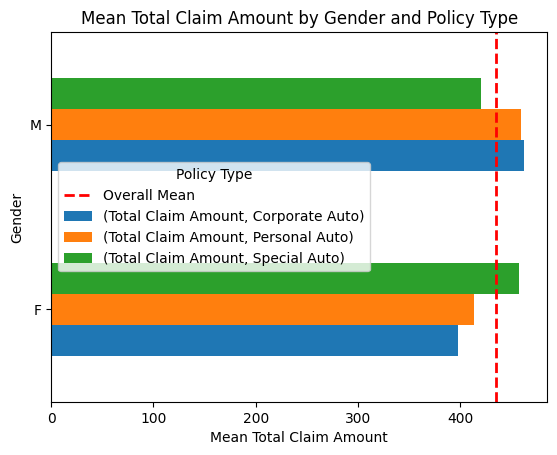

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have the pivot table
result1 = pm.pivot_table(values=["Total Claim Amount"], index="Gender", columns="Policy Type", aggfunc="mean", fill_value=0)

# Display the pivot table
print(result1)

# Plotting the results using a horizontal bar chart
ax = result1.plot(kind="barh")
plt.axvline(result1.values.mean(), color='red', linestyle='dashed', linewidth=2, label='Overall Mean')

plt.title("Mean Total Claim Amount by Gender and Policy Type")
plt.xlabel("Mean Total Claim Amount")
plt.ylabel("Gender")
plt.legend(title="Policy Type")
plt.show()

In [ ]:
# As result we can see that M has higher claims compare to F, except in Special Auto

3. Analyze the total number of customers who have policies in each state, and then filter the results to only include states where there are more than 500 customers.

In [23]:
result = pm.groupby(["State"]).agg({"Customer":"count"}).reset_index()
result

,State,Customer
0,Arizona,1937
1,California,3552
2,Nevada,993
3,Oregon,2909
4,Washington,888


In [24]:
result = result[result["Customer"] > 500]
result

,State,Customer
0,Arizona,1937
1,California,3552
2,Nevada,993
3,Oregon,2909
4,Washington,888


4. Find the maximum, minimum, and median customer lifetime value by education level and gender. Write your conclusions.

In [25]:
pm.groupby(["Education","Gender"]).agg({"Customer Lifetime Value":["max", "min", "median"]}).reset_index()

Education Gender Customer Lifetime Value               \
                                                   max          min   
0              Bachelor      F             73225.95652  1904.000852   
1              Bachelor      M             67907.27050  1898.007675   
2               College      F             61850.18803  1898.683686   
3               College      M             61134.68307  1918.119700   
4                Doctor      F             44856.11397  2395.570000   
5                Doctor      M             32677.34284  2267.604038   
6  High School or Below      F             55277.44589  2144.921535   
7  High School or Below      M             83325.38119  1940.981221   
8                Master      F             51016.06704  2417.777032   
9                Master      M             50568.25912  2272.307310   

                
        median  
0  5640.505303  
1  5548.031892  
2  5623.611187  
3  6005.847375  
4  5332.462694  
5  5577.669457  
6  6039.553187  
7  6286.731006  
8  5729.855012  
9  5579.099207

## Bonus

5. The marketing team wants to analyze the number of policies sold by state and month. Present the data in a table where the months are arranged as columns and the states are arranged as rows.

6.  Display a new DataFrame that contains the number of policies sold by month, by state, for the top 3 states with the highest number of policies sold.

*Hint:*
- *To accomplish this, you will first need to group the data by state and month, then count the number of policies sold for each group. Afterwards, you will need to sort the data by the count of policies sold in descending order.*
- *Next, you will select the top 3 states with the highest number of policies sold.*
- *Finally, you will create a new DataFrame that contains the number of policies sold by month for each of the top 3 states.*

7. The marketing team wants to analyze the effect of different marketing channels on the customer response rate.

Hint: You can use melt to unpivot the data and create a table that shows the customer response rate (those who responded "Yes") by marketing channel.

External Resources for Data Filtering: https://towardsdatascience.com/filtering-data-frames-in-pandas-b570b1f834b9

In [ ]:
# your code goes here